##### Criando uma class Time
Crie uma classe Time que printa a data no formato hh:mm:ss e uma função que receba dois objetos time e retorne True se t1 for seguido cronologicamente por t2

In [ ]:
class Time:
    '''Represents the time of day.'''

    def __init__(self, hour=0, minute=0, second=0):
        '''Initializes a time object.'''
        self.hour = hour
        self.minute = minute
        self.second = second

    def __str__(self):
        '''Returns a string representation of the time.'''
        return f'{self.hour:02}:{self.minute:02}:{self.second:02}'
    

def is_after(time1: Time, time2: Time) -> bool:
    '''Returns True if time1 is after time2; otherwise, returns False.'''
    return (time1.hour, time1.minute, time1.second) < (time2.hour, time2.minute, time2.second)

# initialize two Time objects
t1 = Time(10, 46, 53)
t2 = Time(10, 46, 54)

print(is_after(t1, t2))

True


##### Função para adicionar tempos

In [24]:
def time_to_int(time: Time) -> int:
    '''Converts a Time object to an integer number of seconds.'''
    
    minutes = time.hour * 60 + time.minute
    seconds = minutes * 60 + time.second
    
    return seconds

def add_time(t1: Time, t2: Time) -> Time:
    '''Adds two time objects and returns a new Time object.'''

    time = Time() # create a new Time object
    seconds = time_to_int(t1) + time_to_int(t2) # convert both Time objects to seconds and add them

    minutes, time.second = divmod(seconds, 60) # convert seconds to minutes and seconds
    time.hour, time.minute = divmod(minutes, 60) # convert minutes to hours and minutes

    return time


start = Time(6, 30, 00)
duration = Time(1, 30, 32)

end = add_time(start, duration)

end.__str__()
    

'08:00:32'

##### Exercício 16.1
Escreva uma função mul_time que receba um objeto time e multiplique-o por um número.
Em seguida, use essa função para calcular o pace de uma corrida, fornecendo o tempo de duração e a distancia

In [32]:
def mul_time(t: Time, n: int|float) -> Time:
    '''Multiplies a Time object by a number and returns a new Time object.'''
    
    time = Time()
    seconds = time_to_int(t) * n # multiply the Time object by 2
    
    minutes, time.second = divmod(seconds, 60) # convert seconds to minutes and seconds
    time.hour, time.minute = divmod(minutes, 60) # convert minutes to hours and minutes

    return time

# calculating the pace based on the time and distance
distance = 13.1
t1 = Time(1, 34, 5)

t_end = mul_time(t=t1, n= 1 / distance) # calculate the time to run 10 miles
print(t_end)

0.0:7.0:10.916030534351137


##### Exercício 16.2
Usando o módulo datetime, escreva um programa que recebe a data atual e retorne o dia da semana

In [ ]:
import datetime

# days of the week
days = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']

date = datetime.date(2025, 3, 26)

# search in the list of days the day of the week corresponding to the date.weekday() method
print(f'Dia da semana: {days[date.weekday()]}')

Dia da semana: wednesday


##### Exercício 16.2
Escreva um exercício que reeceba um aniversário como entrada e calcule a idade do usr e o número de dias, horas, minutos e seegundos até o seu próximo aniversário

In [ ]:
# testes
aniver = input('Digite a data do seu aniversário (dd/mm/yyyy): ')

try:
    aniver_v1 = datetime.datetime.strptime(aniver, '%d/%m/%Y') # cast the string to a datetime object
    # aniver_v2 = datetime.datetime.strftime(aniver, '%d/%m/%Y') # here, the string is already a datetime object and we are to format it

except TypeError as e:
    print(f'{e}')

else:
    print(aniver_v1)

1999-01-18 00:00:00


In [ ]:
# birthday date from user
aniver = input('Digite a data do seu aniversário (dd/mm/yyyy): ')

# convert the string to a datetime object
cast_aniver = datetime.datetime.strptime(aniver, '%d/%m/%Y')

# get the current date
today = datetime.datetime.now()

# calculate the user's age
age = (today - cast_aniver).days // 365

# next birthday
if (next_birthday:= datetime.datetime(today.year, cast_aniver.month, cast_aniver.day)) < today: # in case the user's birthday has not yet arrived
    
    year = next_birthday.year + 1
    next_birthday = datetime.datetime(year, cast_aniver.month, cast_aniver.day)

print(f'Your age: {age} years old and next birthday: {next_birthday: %d/%m/%Y}')

Your age: 51 years old and next birthday:  07/08/2025


##### Exercício 16.3
Escreva um programa que dado o aniversario de dois usuários, calcule o dia duplo deles, isto é, a data onde a idade de um é o dobro da outra

Para isso, precisamos equacionar o problema da seguinte forma:<br>

a idade do user 1 segue uma reta do tipo y = x <br>
a idade do user 2 segue uma reta do tipo y = x + d, onde d é a diferença em anos do user 1 e do user 2 <br>
o dobro da idade do user 1 é uma equação do tipo y = 2x <br>

Logo, estamos interessados no ponto que intersecta as equações da idade do user 2 e do dobro da idade do user 1, isto é, o ponto onde a idade do user 2 é o dobro da do user 1, logo: <br>
x + d = 2x -> x = d <br>

O d representa a diferença em anos entre user 1 e user 2, considerando como referencia a data de nascimento do user 1 (mais novo que o user 2), sendo o ponto que satisfaz a igualdade.<br>

Logo, para encontrar o double day, precisamos somar essa diferença d à data de nascimento do user 1 e verificar se a data resultante é antes ou depois do aniversário do user 2, pois a máxima data entre essas duas, será a data onde a idade do user 2 será o dobro da do user 1

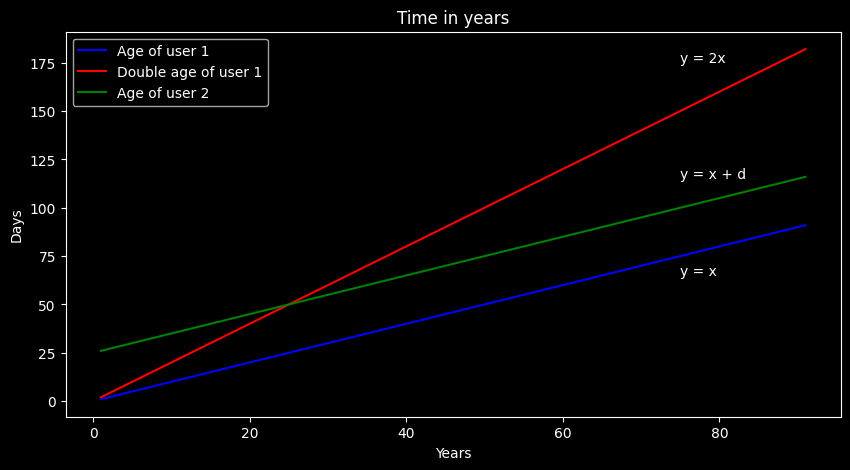

In [46]:
import datetime
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta

# get the current date
today = datetime.date.today()

# birth of both users
user_birth1 = datetime.date(1999, 1, 18)
user_birth2 = datetime.date(1973, 8, 7)

# calculate the ages
age_user1 = (today - user_birth1).days // 365
age_user2 = (today - user_birth2).days // 365

# differences between the ages
diff_age = age_user2 - age_user1 # this difference represents the time (in years) at which the age is doubling

x_time_in_years = range(1, 100, 10)

y_years = time_in_years = range(1, 100, 10)

y_double_years = [x * 2 for x in y_years]

age_of_user2 = [x + diff_age for x in x_time_in_years]

fig, ax = plt.subplots(figsize=(10, 5))

# plotting the 3 lines on the same graph 

# in this problem, the x-axis represents the time in years and the y-axis represents the age of the user in years
# to solve it, we need to equate the ages of user 2 and double the age of user 1, resulting in the equation y = x + d = 2x -> x = d
# where d is the difference between the ages of user 1 and user 2, representing the time (in years) at which the age is doubling in relation to user 1 birth
l1 = ax.plot(x_time_in_years, y_years, label='Age of user 1', color='blue')
l2 = ax.plot(x_time_in_years, y_double_years, label='Double age of user 1', color='red')
l3 = ax.plot(x_time_in_years, age_of_user2, label='Age of user 2', color='green')

ax.annotate('y = 2x', xy=(5, 26), xytext=(75, 175))
ax.annotate('y = x + d', xy=(5, 26), xytext=(75, 115))
ax.annotate('y = x', xy=(5, 26), xytext=(75, 65))

ax.set_title('Time in years')
ax.set_xlabel('Years')
ax.set_ylabel('Days')
ax.legend()

plt.show()



In [48]:
from dateutil.relativedelta import relativedelta

def get_double_day(user_birth1: datetime, user_birth2: datetime) -> datetime:
    '''Calculates the double birthday of two users.
    For this function to work properly, the user 1 must be younger than user 2.'''
    
    # get the current date
    today = datetime.date.today()

    # calculate the ages
    age_user1 = (today - user_birth1).days // 365
    age_user2 = (today - user_birth2).days // 365

    # differences between the ages
    diff_age = age_user2 - age_user1 # this difference represents the time (in years) at which the age is doubling
    
    if diff_age > 0:

        double_birth_user1 = user_birth1 + relativedelta(years=diff_age) # potential double birthday
        double_birth_user2 = datetime.date(double_birth_user1.year, user_birth2.month, user_birth2.day)

        return double_birth_user1 if double_birth_user1 > double_birth_user2 else double_birth_user2
    
    else:
        raise ValueError('User 1 must be younger than user 2.')

# birth of both users
user_birth1 = datetime.date(1999, 1, 18)
user_birth2 = datetime.date(1973, 8, 7)

double_day = get_double_day(user_birth1, user_birth2)

print(f'Double birthday: {double_day.strftime("%d/%m/%Y")}')

Double birthday: 07/08/2024


##### Exercício 16.4
Para um desafio um pouco maior, escreva uma programa que calcule o dia em que uma pessoa é n vezes mais velha do que outra

Se para o caso do double day, nossa equação é 2x = x + d -> x = d, para saber o valor de x quando queremos o dia n, isto é, a quantidade de anos que se passaram da data de nascimento do user 1, para que o user 2 seja n vezes mais velha que o user 1, podemos fazer: <br> 

n.x = x + d -> x(n - 1) = d -> x = d / (n-1), onde d é a diferença em anos entre o user1 e o user2. O valor de x representa quantos anos se passaram da data de nascimento do user 1 (user mais novo)

In [ ]:
def get_n_day(n: int, user1_birth: datetime, user2_birth: datetime) -> datetime:
    '''Calculates the n-day of of two users'''

    # get the current date
    today = datetime.date.today()

    # calculate the ages
    age1 = (today - user1_birth).days // 365
    age2 = (today - user2_birth).days // 365

    diff_age = (age2 - age1) // (n - 1) # this difference represents the time (in years) at which the age of user 2 is n times the age of user 1

    if diff_age > 0:
        n_day_user1 = user1_birth + relativedelta(years=diff_age) # potential n-day birthday
        n_day_user2 = datetime.date(n_day_user1.year, user2_birth.month, user2_birth.day)

        return n_day_user1 if n_day_user1 > n_day_user2 else n_day_user2 # return the n-day birthday of user 1 or user 2 (the most recent date between both of them)

    else:
        raise ValueError('User 1 must be younger than user 2.')

# birth of both users
birthday_user1 = datetime.date(1999, 1, 18)
birthday_user2 = datetime.date(1976, 12, 25)

n_day = get_n_day(3, birthday_user1, birthday_user2)
print(f'The n-day birthday is: {n_day.strftime("%d/%m/%Y")}')

The n-day birthday is: 25/12/2010


##### Assertion operator
It's used to validate expressions and optionally we can raise a message error if the assertion fails.

In [49]:
assert 1 == 1, '1 is not equal to 1'

In [50]:
assert 2 == 3, '2 is not equal to 3'

AssertionError: 2 is not equal to 3